# Synthesizing music

### What Is a Synthesizer?
*"A synthesizer is an electronic instrument that sends out electronic signals, which can be directly injected into a mixer or recording equipment. Use a synthesizer in music recording to recreate instrument sounds or make frequency sweeps with help from a recording studio engineer in this free video on music synthesizers."*

<center>Recommended video: **Music Recording: What Is a Synthesizer?**
[![Music Recording: What Is a Synthesizer?](http://img.youtube.com/vi/xNHBpGVJfrk/0.jpg)](http://www.youtube.com/watch?v=xNHBpGVJfrk)

**Expert:** Brad Winslow <br>
**Bio:** Brad Wilnslow has worked in the music production industry for over ten years. <br>
**Filmmaker:** Nathan Boehme <br></center>

### How to synthesize music using Python?

There are several ways. According to Mumford, the easiest way to synthesize random samples from stationary Gaussian processes is by randomly choosing Fourier coefficients from a Gaussian distribution with mean zero and whatever variance you want and then taking the Fourier transform.

#### Synthesize colored noise with a power law power spectrum.
In other words, take the real and imaginary parts of the Fourier coefficients $\hat{s}_k$, $0 \leq k < N$ to be random normal variables with mean 0 and standard deviation $1/ \min(k, N − k)^\lambda$, but with $\hat{s}_0 = 0$, $\hat{s}_{N −k} = \hat{s}_k $. Note that low frequencies come from the Fourier coefficients with index either near zero or near $N$. First approach? Take the size of the vector $N$ to be 1024. Do this for $\lambda$ = 0, 0.5, 1, and 2 and plot the results. What do you see?

In [3]:
# We import our libraries:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

In [4]:
# We set some variables:
N    = 1024 # Number of samples
lmbd = [0, 0.5, 1, 2] # Lambda for a power law
n    = len(lmbd)
x    = np.linspace(0, N, N, endpoint=False) # x-axis linspace

# Colored noise function:
def colored_noise(N, lmbd):
    # We set our variables:
    n = len(lmbd)
    y = np.zeros((n, N)) # y-axis zeros

    # We define our y = f(x) axis:
    for i in range(n):
        for k in range(1, N):
            y[i, k] = np.random.normal(0., 1./(np.min((k, N - k)))**lmbd[i])

    # FFT:
    f_vec = np.array([ np.fft.fft(y[i]) for i in range(n) ])
    
    return f_vec

# We get some colored noises!
f_vec = colored_noise(N, lmbd)

### Now let's plot the results:

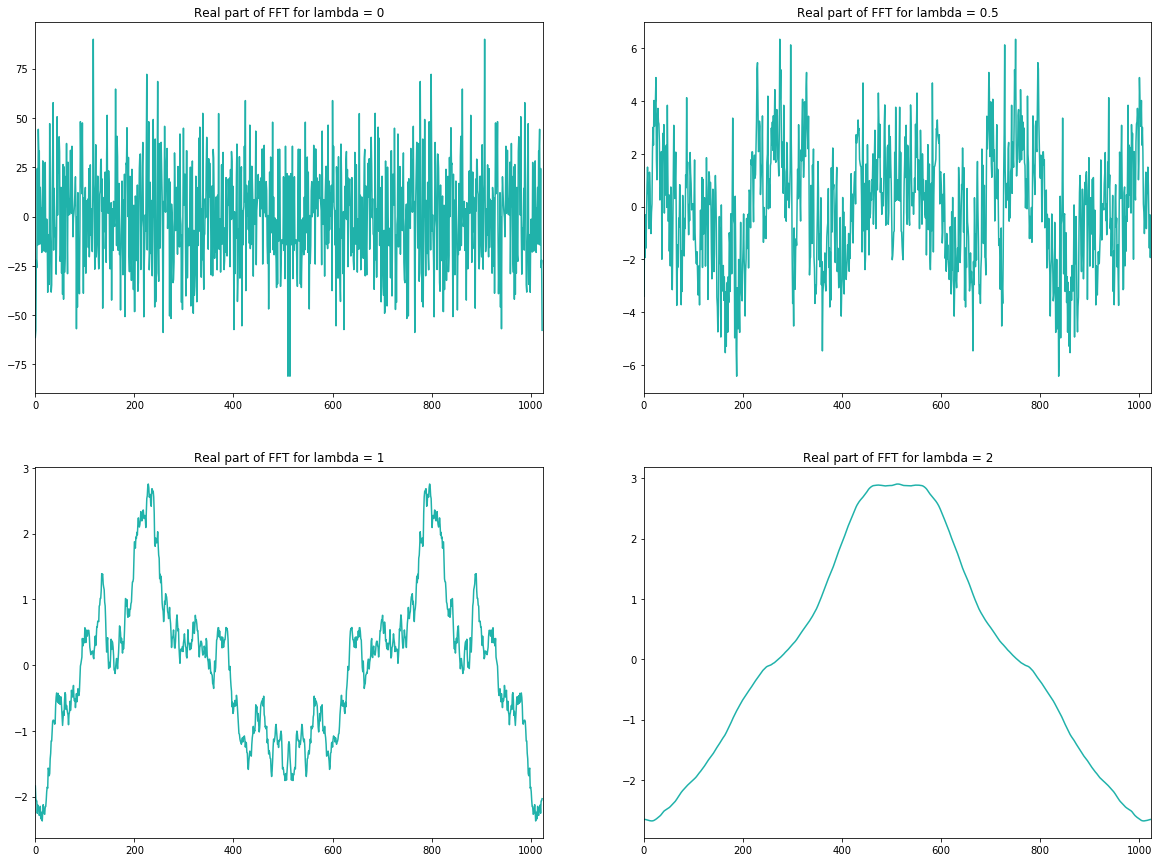

In [5]:
# Real part:
fig, ax = plt.subplots(figsize=(20,15))
for i in range(n):
    plt.subplot(2, 2, i+1)
    plt.title("Real part of FFT for lambda = {}".format(lmbd[i]))
    plt.plot(x, f_vec[i].real, "lightseagreen")
    plt.xlim(0, N)
plt.savefig("real_noise.png")

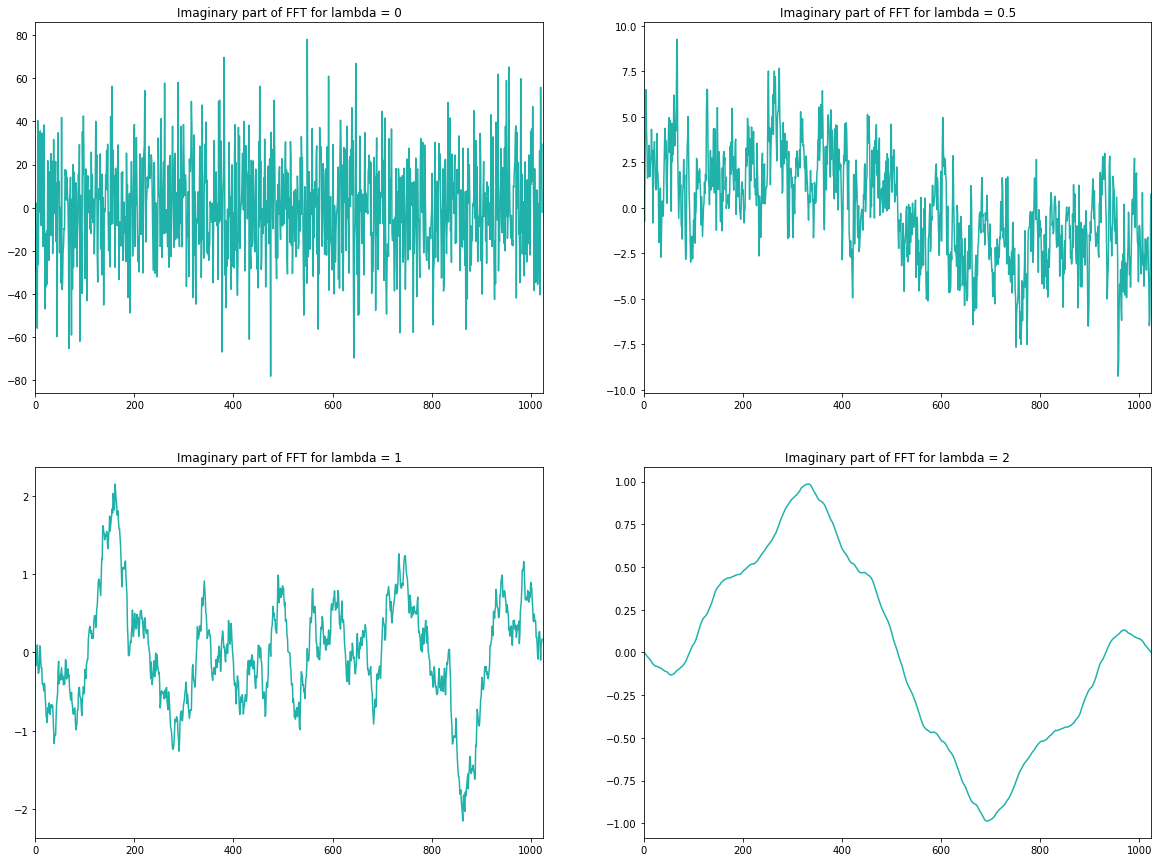

In [6]:
# Imaginary part:
fig, ax = plt.subplots(figsize=(20,15))
for i in range(n):
    plt.subplot(2, 2, i+1)
    plt.title("Imaginary part of FFT for lambda = {}".format(lmbd[i]))
    plt.plot(x, f_vec[i].imag, "lightseagreen")
    plt.xlim(0, N)
plt.savefig("imag_noise.png")

### Now let's listen!

In [7]:
# Real part
# Setting index for each one:
wave = 10000 * f_vec.real[0] # Change for each index
wav_wave = np.array(wave, dtype=np.int16)
Audio(wav_wave, rate=44100)

In [8]:
# Imaginary part
# Setting index for each one:
wave = 10000 * f_vec.imag[0] # Change for each index
wav_wave = np.array(wave, dtype=np.int16)
Audio(wav_wave, rate=44100)

### Too short?
Let's expand our sampling.

In [9]:
# We set a length factor to increase time:
len_factor = 64

# We get some colored noises, again!
long_vec = colored_noise(len_factor * N, lmbd)

# We define our listening function:
def listen_the_noise(sampling, index, real=True):
    if real:
        wave = 10000 * sampling.real[index] # We scale the factor to a human-able amplitude
    else:
        wave = 10000 * sampling.imag[index] # We scale the factor to a human-able amplitude
    noise = np.array(wave, dtype=np.int16)
    return noise

In [10]:
# Color noise:
noise = listen_the_noise(long_vec, 1)
Audio(noise, rate=44100)

<img src="http://image.slidesharecdn.com/reflection-of-sound2-1232789656055505-1/95/reflection-of-sound-part-2-19-728.jpg" width="50%">

#### Synthesize random single notes of music
Synthesize random single notes of music by taking the Gaussian distribution. Here, $s(k)$ is assumed to “wrap around” above $N$ (i.e., $s_{N+k} = s_k$). Recall that we worked out the corresponding power in
Section 2.3.2. You may try $N = 8192$, $p = 32$. Listen to what you have produced.

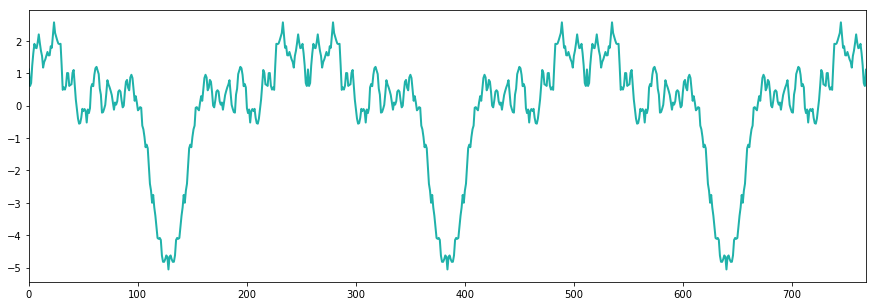

In [13]:
def concatenate_the_noise(period, N, p, index, real=True):
    if real:
        f_vec = np.concatenate((period[index].real, period[index].real))
    else:
        f_vec = np.concatenate((period[index].imag, period[index].imag))
    
    # We concatenate several times to get our synthetic sound:
    power = int(np.ceil(np.log2(p)))
    for i in range(power):
        f_vec = np.concatenate((f_vec, f_vec))
        
    return f_vec[:int(N*p)]

def listen_the_synth(sampling):
    wave = 10000 * sampling # We scale the factor to a human-able amplitude
    synth = np.array(wave, dtype=np.int16)
    return synth
    
# We set our variables:
N = 8192 # Sample lenght
p = 32   # Sub-sampple size
q = N/p  # Number of cycles (256 in this case)

# We set our linspaces:
x      = np.linspace(0, N, N, endpoint=False)
period = colored_noise(int(q), lmbd)

# And concatenate to get our synth sound:
wave = concatenate_the_noise(period, p, q, 2, real=True) # Index is for different lambdas

# We plot and listen:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(x, wave, "lightseagreen", linewidth=2)
plt.xlim(0, 3*q)

synth = listen_the_synth(wave)
Audio(synth, rate=44100)

### Let's check the *power spectrum*
<img src="https://strathmaths.files.wordpress.com/2012/01/f_pianowaves.gif">

In [14]:
# Let's set some variables:
sd.default.samplerate = 44100
time = 2.0
frequency = 440

# Generate time of samples between 0 and two seconds
samples = np.arange(44100 * time) / 44100.0
# Recall that a sinusoidal wave of frequency f has formula w(t) = A*sin(2*pi*f*t)
wave = 10000 * np.sin(2 * np.pi * frequency * samples)
# Convert it to wav format (16 bits)
wav_wave = np.array(wave, dtype=np.int16)

Audio(wav_wave, rate=44100)

NameError: name 'sd' is not defined

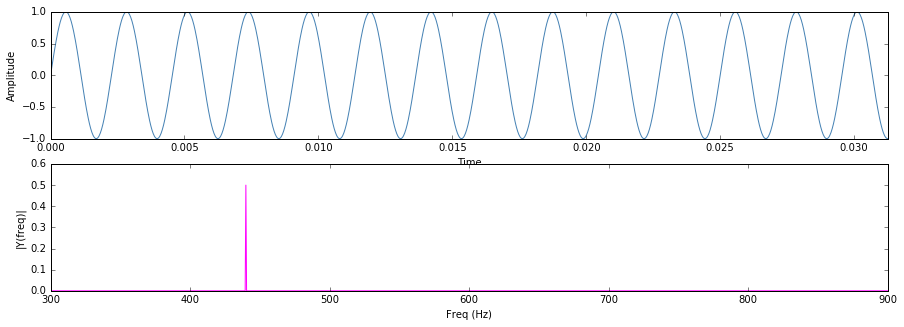

In [26]:
Fs = 44100.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,time,Ts) # time vector

ff = 5;   # frequency of the signal
y = np.sin(2 * np.pi * frequency * samples)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1, figsize=(15,5))
ax[0].plot(t, y, 'steelblue')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlim(0, time/64)
ax[1].plot(frq, abs(Y), 'magenta') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].set_xlim(300, 900)
plt.savefig("spec.png")

### Let's play a bit!
<img src="http://m.eet.com/media/1064545/sound7_fig1.45.jpg" width="50%">

In [1]:
# We set our variables:
N      = 8192 # Sample lenght
p      = 32   # Sub-sampple size
q      = N/p  # Number of cycles (256 in this case)
lmbd   = [0, 0.5, 1, 2, 3, 5]        # Lambda for a power law
period = colored_noise(int(q), lmbd) # We generate some noise

# We concatenate some waves:
synth1 = np.concatenate((period[1].imag, period[0].imag))
synth1 = np.concatenate((synth1, synth1))
synth1 = np.concatenate((synth1, synth1))
synth1 = np.concatenate((synth1, synth1))

synth2 = np.concatenate((period[0].imag, period[1].real))
synth2 = np.concatenate((synth2, synth2))
synth2 = np.concatenate((synth2, synth2))

synth3 = np.concatenate((period[0].imag, period[0].imag))
synth3 = np.concatenate((synth3, synth3))
synth3 = np.concatenate((synth3, synth3))
synth3 = np.concatenate((synth3, synth3))
synth3 = np.concatenate((synth3, synth3))
synth3 = np.concatenate((synth3, synth3))

Rsynth = np.concatenate((synth1, synth2))
Rsynth = np.concatenate((synth1, synth2, synth3))
Rsynth = np.concatenate((Rsynth, Rsynth))
Rsynth = np.concatenate((Rsynth, Rsynth))

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(np.linspace(0, len(Rsynth), len(Rsynth)), Rsynth)
plt.xlim(0,len(Rsynth)/128)

Audio(Rsynth, rate=44100)

NameError: name 'colored_noise' is not defined

## Recommended videos:
### 1. Simple additive synth
<br>
<center>[![Basic Sound Processing in Python | SciPy 2015 | Allen Downey](http://img.youtube.com/vi/PU8M0eIqgy4/0.jpg)](http://www.youtube.com/watch?v=PU8M0eIqgy4)</center>

##### Plus:
- Check its [github](https://github.com/Penguinum/python-synth)


### 2. Basic Sound Processing in Python | SciPy 2015 | Allen Downey:
<br>
<center>[![Basic Sound Processing in Python | SciPy 2015 | Allen Downey](http://img.youtube.com/vi/0ALKGR0I5MA/0.jpg)](http://www.youtube.com/watch?v=0ALKGR0I5MA)</center>

##### Plus:
- Check his book's [webpage](http://greenteapress.com/thinkdsp/html/index.html)
- Check its [PDF version](http://greenteapress.com/thinkdsp/thinkdsp.pdf)
- Check its [github](https://github.com/AllenDowney/ThinkDSP)